In [1]:
# plotting
import numpy as np
import matplotlib.pyplot as plt

def plot_clustering(embedding, y): # plot clustering
    x_min = np.min(embedding, axis = 0)
    x_max = np.max(embedding, axis = 0)
    plot_embedding = (embedding - x_min) / (x_max - x_min)
    
    plt.figure(figsize = (6, 4))
    for digit in y:
        plt.scatter(
            *embedding[y == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(clustering.labels_[y == digit] / 10),
            alpha=0.5,
        )
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [47]:
# align clusters with data values (NOTE NOT ALL VALUES ACCOUNTED FOR BY CLUSTERS)
from statistics import mode

def relabel_clusters(cluster_labels, y):
    cluster_0 = []
    cluster_1 = []
    cluster_2 = []
    cluster_3 = []
    cluster_4 = []
    cluster_5 = []
    cluster_6 = []
    cluster_7 = []
    cluster_8 = []
    cluster_9 = []

    for i in range(len(cluster_labels)):
        if cluster_labels[i] == 0:
            cluster_0.append(i) # indices for cluster 0 values
        elif cluster_labels[i] == 1:
            cluster_1.append(i) # indices for cluster 1 values
        elif cluster_labels[i] == 2:
            cluster_2.append(i) # indices for cluster 2 values
        elif cluster_labels[i] == 3:
            cluster_3.append(i) # indices for cluster 3 values
        elif cluster_labels[i] == 4:
            cluster_4.append(i) # indices for cluster 4 values
        elif cluster_labels[i] == 5:
            cluster_5.append(i) # indices for cluster 5 values
        elif cluster_labels[i] == 6:
            cluster_6.append(i) # indices for cluster 6 values
        elif cluster_labels[i] == 7:
            cluster_7.append(i) # indices for cluster 7 values
        elif cluster_labels[i] == 8:
            cluster_8.append(i) # indices for cluster 8 values
        elif cluster_labels[i] == 9:
            cluster_9.append(i) # indices for cluster 9 values
    
    y_cluster_0 = []
    y_cluster_1 = []
    y_cluster_2 = []
    y_cluster_3 = []
    y_cluster_4 = []
    y_cluster_5 = []
    y_cluster_6 = []
    y_cluster_7 = []
    y_cluster_8 = []
    y_cluster_9 = []

    for i in range(len(cluster_0)):
        y_cluster_0.append(y[cluster_0[i]]) # find y values for cluster 0

    for i in range(len(cluster_1)):
        y_cluster_1.append(y[cluster_1[i]]) # find y values for cluster 1

    for i in range(len(cluster_2)):
        y_cluster_2.append(y[cluster_2[i]]) # find y values for cluster 2

    for i in range(len(cluster_3)):
        y_cluster_3.append(y[cluster_3[i]]) # find y values for cluster 3

    for i in range(len(cluster_4)):
        y_cluster_4.append(y[cluster_4[i]]) # find y values for cluster 4

    for i in range(len(cluster_5)):
        y_cluster_5.append(y[cluster_5[i]]) # find y values for cluster 5

    for i in range(len(cluster_6)):
        y_cluster_6.append(y[cluster_6[i]]) # find y values for cluster 6

    for i in range(len(cluster_7)):
        y_cluster_7.append(y[cluster_7[i]]) # find y values for cluster 7

    for i in range(len(cluster_8)):
        y_cluster_8.append(y[cluster_8[i]]) # find y values for cluster 8

    for i in range(len(cluster_9)):
        y_cluster_9.append(y[cluster_9[i]]) # find y values for cluster 9

    y_cluster_modes = [mode(y_cluster_0), mode(y_cluster_1), mode(y_cluster_2), mode(y_cluster_3), mode(y_cluster_4), mode(y_cluster_5), mode(y_cluster_6), mode(y_cluster_7), mode(y_cluster_8), mode(y_cluster_9)]

    pred = []

    for i in range(len(cluster_labels)):
        pred.append(y_cluster_modes[cluster_labels[i]])
    return(pred, y_cluster_modes)

In [41]:
# confusion matrix 
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sb
import pandas as pd

def confusion_matrix_visualisation(y, pred):
    cm = confusion_matrix(y, pred, normalize = 'true')
    fig, ax = plt.subplots(figsize = (10,8))
    sb.heatmap(cm, annot = True, cmap = 'OrRd', fmt = '.1%', ax = ax, vmin = 0, vmax = 1)
    ax.set_xlabel('prediction')
    ax.set_ylabel('label')

In [4]:
# data set up
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering

from sklearn.datasets import load_digits
mnist = load_digits() # 1797 images

x, y = mnist.data, mnist.target # x contains image data, y contains image labels
n_samples, n_features = x.shape # number of samples: images in set; number of features: pixels in image

np.random.seed(0)

embedding = manifold.SpectralEmbedding(n_components = 2).fit_transform(x)

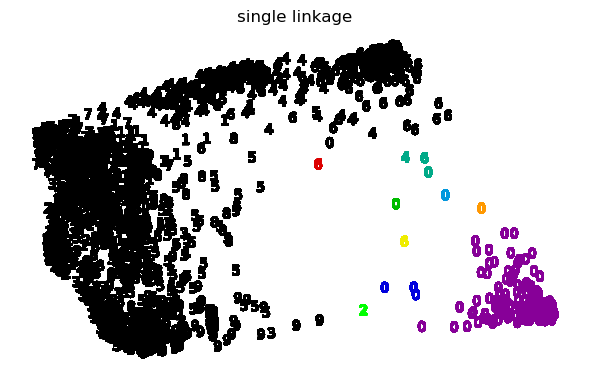

Accuracy Score: 0.2020033388981636
Clusters found: [0, 0, 0, 0, 0, 2, 3, 6, 6, 6]


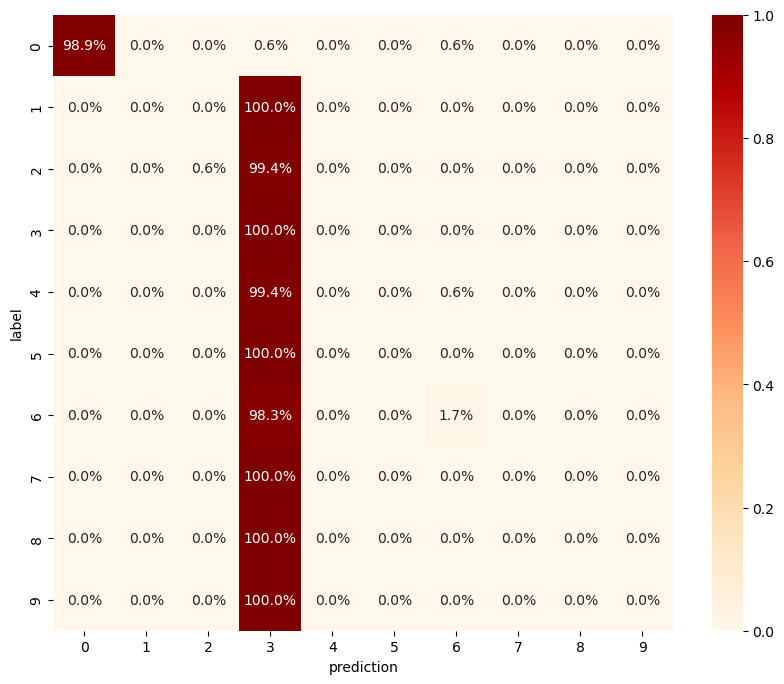

In [49]:
# single linkage - min distances between all observations 
clustering = AgglomerativeClustering(linkage = 'single', n_clusters = 10) # number of clusters: number of digits
clustering.fit(embedding)
    
# plot
plot_clustering(embedding, y)
plt.title('single linkage')
plt.show()

# confusion matrix
pred, pred_clusters = relabel_clusters(clustering.labels_, y)
cm = confusion_matrix_visualisation(y, pred)
print('Accuracy Score: {}'.format(accuracy_score(y, pred, normalize = True)))
print('Clusters found: {}'.format(sorted(pred_clusters)))

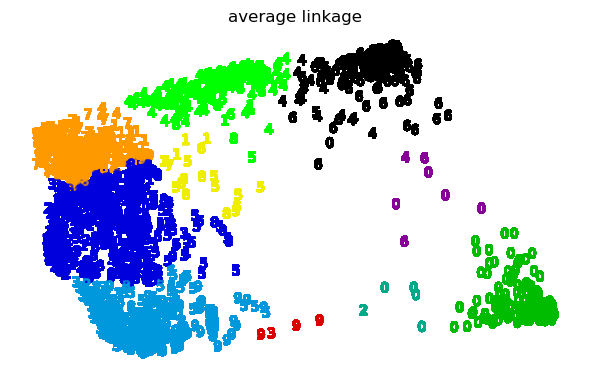

Accuracy Score: 0.5564830272676683
Clusters found: [0, 0, 0, 2, 3, 4, 5, 6, 7, 9]


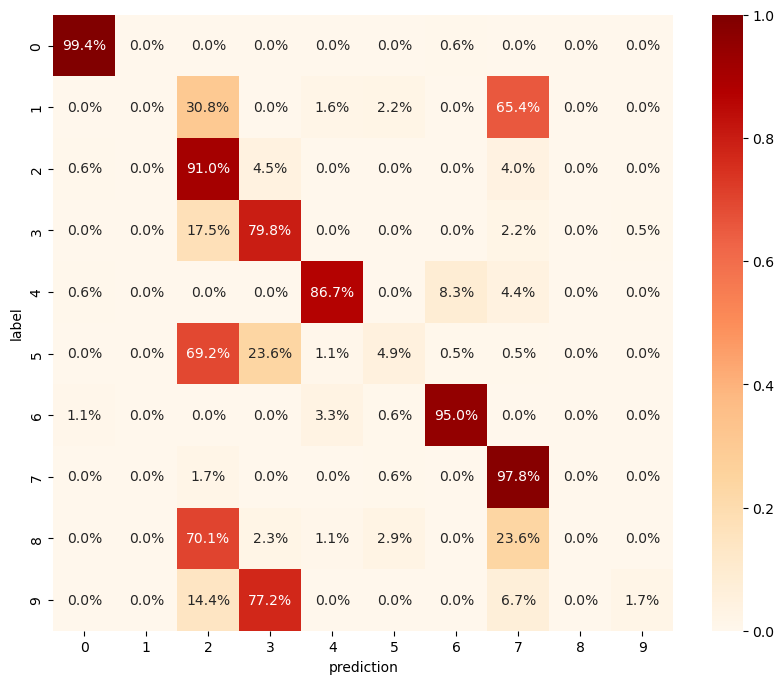

In [51]:
# average linkage - average distance of each observation
clustering = AgglomerativeClustering(linkage = 'average', n_clusters = 10) # number of clusters: number of digits
clustering.fit(embedding)
    
# plot
plot_clustering(embedding, y)
plt.title('average linkage')
plt.show()

# confusion matrix
pred, pred_clusters = relabel_clusters(clustering.labels_, y)
cm = confusion_matrix_visualisation(y, pred)
print('Accuracy Score: {}'.format(accuracy_score(y, pred, normalize = True)))
print('Clusters found: {}'.format(sorted(pred_clusters)))

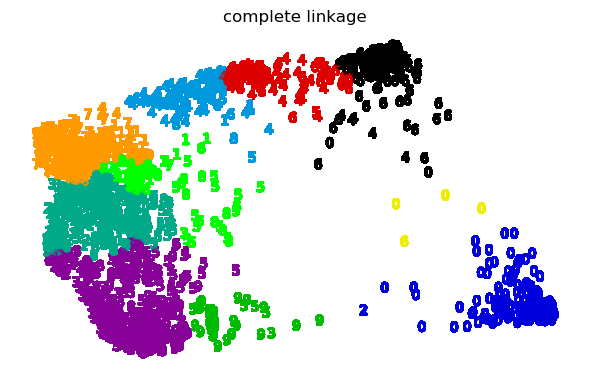

Accuracy Score: 0.5581524763494713
Clusters found: [0, 0, 2, 3, 4, 4, 6, 7, 8, 9]


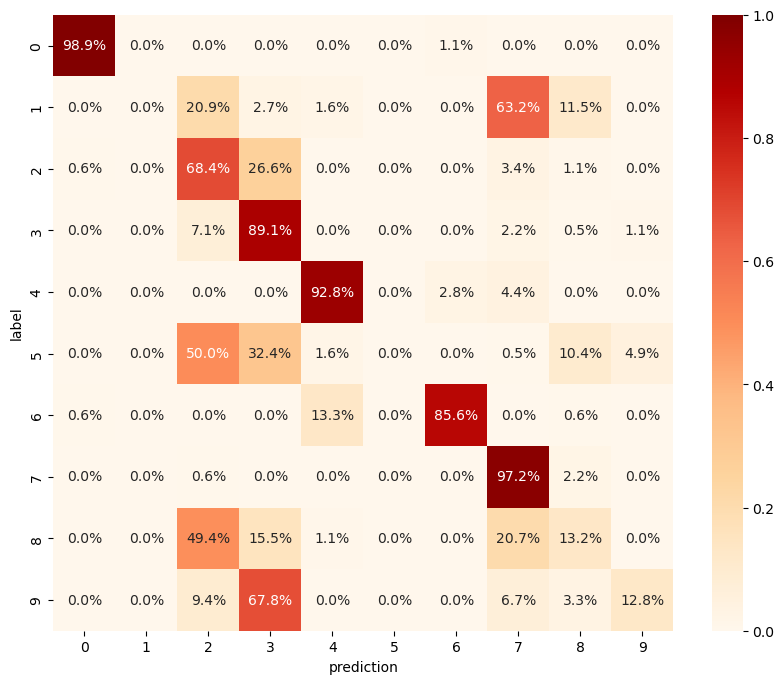

In [52]:
# complete linkage - max distances between all observations
clustering = AgglomerativeClustering(linkage = 'complete', n_clusters = 10) # number of clusters: number of digits
clustering.fit(embedding)
    
# plot
plot_clustering(embedding, y)
plt.title('complete linkage')
plt.show()

# confusion matrix
pred, pred_clusters = relabel_clusters(clustering.labels_, y)
cm = confusion_matrix_visualisation(y, pred)
print('Accuracy Score: {}'.format(accuracy_score(y, pred, normalize = True)))
print('Clusters found: {}'.format(sorted(pred_clusters)))

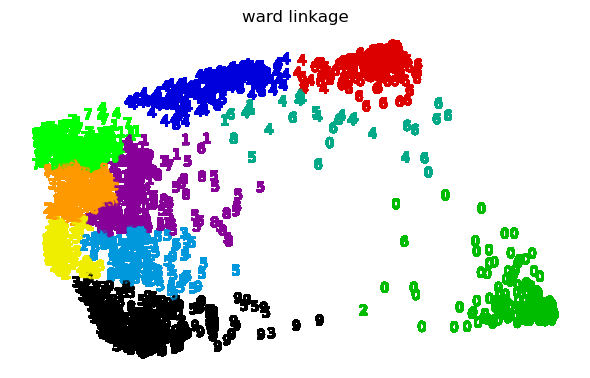

Accuracy Score: 0.6316082359488036
Clusters found: [0, 2, 3, 4, 4, 5, 5, 6, 7, 8]


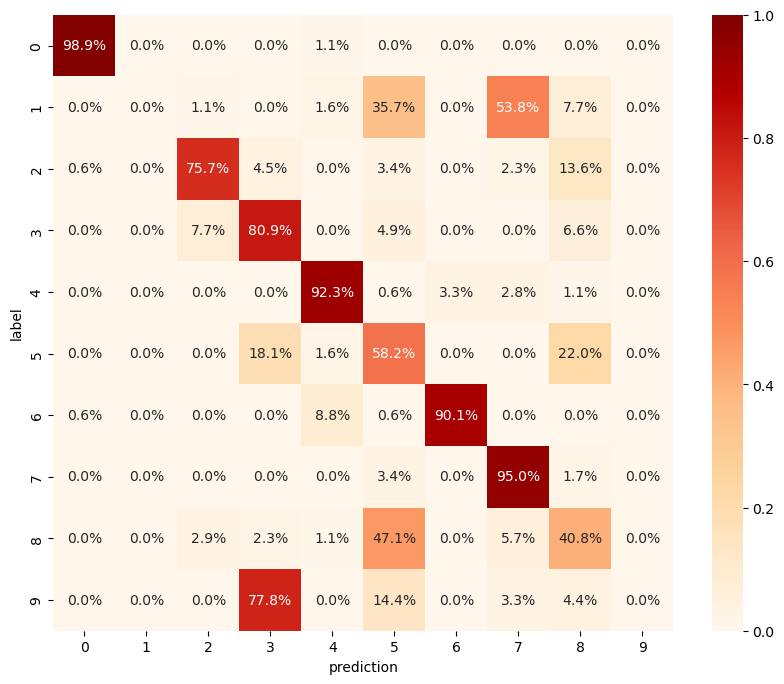

In [53]:
# ward linkage - min variance in clusters being merged
clustering = AgglomerativeClustering(linkage = 'ward', n_clusters = 10) # number of clusters: number of digits
clustering.fit(embedding)
    
# plot
plot_clustering(embedding, y)
plt.title('ward linkage')
plt.show()

# confusion matrix
pred, pred_clusters = relabel_clusters(clustering.labels_, y)
cm = confusion_matrix_visualisation(y, pred)
print('Accuracy Score: {}'.format(accuracy_score(y, pred, normalize = True)))
print('Clusters found: {}'.format(sorted(pred_clusters)))